### Assignment of Age to Synthetic Population

This notebook covers the code, choices and logic behind assigning ages to a synthetic population of agents for the city of Den Haag. The source data for this notebook is from https://denhaag.incijfers.nl/viewer

We begin by importing the required libraries for this process.

In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


Now we import the raw data file that has been downloaded as an Excel file from Den Haag in Cijfers website. This dataset focuses on the 21 class division of ages where each age group consists of a 5 year span. 

In [7]:
df_counts = pd.read_excel("Demographics/21age_raw_data.xlsx", header=0)
df_counts.columns = df_counts.iloc[0]  # Set first row as header
df_counts = df_counts.iloc[1:].reset_index(drop=True)  # Remove the first row from data
df_counts = df_counts.rename(columns={df_counts.columns[0]: "Neighbourhood"})

df_counts.head()

,Neighbourhood,0 to 4-year-olds,5 to 9-year-olds,10 to 14-year-olds,15 to 19-year-olds,20 to 24-year-olds,25 to 29-year-olds,30 to 34-year-olds,35 to 39-year-olds,40 to 44-year-olds,...,60 to 64-year-olds,65 to 69-year-olds,70 to 74-year-olds,75 to 79-year-olds,80 to 84-year-olds,85 to 89-year-olds,90 to 94-year-olds,95 to 99-year-olds,100-year-olds and above,Number of residents per 1-1
0,Oud Scheveningen,148,145,127,115,148,156,223,256,239,...,176,161,142,133,68,36,12,x,x,2925
1,Vissershaven,204,224,197,238,266,331,377,327,353,...,319,309,253,243,118,82,47,5,x,4894
2,Scheveningen Badplaats,238,233,275,265,349,360,476,457,440,...,346,286,248,235,135,62,20,5,x,5656
3,Visserijbuurt,199,195,237,232,237,266,295,285,290,...,216,229,189,200,129,82,35,9,x,4107
4,v Stolkpark/Schev Bosjes,25,28,28,52,32,37,33,41,43,...,63,57,52,65,26,20,12,x,x,795


Here, the age groups have certain data that is hidden. Hence a separate data column where the total number of all residents in each neighbourhood is also imported so missing values and hidden data can be plugged in accordingly. 

In [8]:
num_agents =  df_counts["Number of residents per 1-1"].sum()
print(num_agents)

569387


So, as we can see there are 56,9387 residents that we need to create in our synthetic population. Since we are generating them synthetically, I am assigning each agent a unique numerical ID.

In [9]:
seed = 42
rng = np.random.RandomState(seed)
n_agents = num_agents
n_agents = int(n_agents)
print(n_agents)

569387


Now, each agent is assigned to a particular neighbourhood. All agents are then saved to a csv file so that it is easy to generate agents in Mesa. Each column will corrospond to a property the agent will have. 

In [12]:
# create a random permutation of 1…n_agents
random_ids = rng.permutation(n_agents) + 1

# Expand df_counts so each neighbourhood is repeated by its count
expanded_neighbourhoods = np.repeat(df_counts["Neighbourhood"].values, df_counts["Number of residents per 1-1"].fillna(0).astype(int).values)
df_expanded = pd.DataFrame({
	"Individual_ID": random_ids,
	"neighbourhood": expanded_neighbourhoods
})

# ─── Step 4: Select & reorder columns, and write to CSV ────────────────────────
df_agents = df_expanded[["Individual_ID", "neighbourhood"]]
df_agents.to_csv("agents.csv", index=False)


C:\Users\nachi\AppData\Local\Temp\ipykernel_11604\2815210571.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  expanded_neighbourhoods = np.repeat(df_counts["Neighbourhood"].values, df_counts["Number of residents per 1-1"].fillna(0).astype(int).values)


In [13]:
print(f"Generated agents.csv with {n_agents:,} rows.")

Generated agents.csv with 569,387 rows.


In [14]:
# Load the raw distribution data
df = pd.read_excel('Demographics/21age_raw_data.xlsx')
df.columns = df.iloc[0]  # Set first row as header
df = df.iloc[1:].reset_index(drop=True)  # Remove the first row from data
df = df.rename(columns={df.columns[0]: "Neighbourhood"})


# Display DataFrame info for column types and non-null counts
print("DataFrame info:")
print(df.info(), "\n")


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Neighbourhood                114 non-null    object
 1   0 to 4-year-olds             111 non-null    object
 2   5 to 9-year-olds             111 non-null    object
 3   10 to 14-year-olds           111 non-null    object
 4   15 to 19-year-olds           111 non-null    object
 5   20 to 24-year-olds           111 non-null    object
 6   25 to 29-year-olds           111 non-null    object
 7   30 to 34-year-olds           111 non-null    object
 8   35 to 39-year-olds           111 non-null    object
 9   40 to 44-year-olds           111 non-null    object
 10  45 to 49-year-olds           111 non-null    object
 11  50 to 54-year-olds           111 non-null    object
 12  55 to 59-year-olds           111 non-null    object
 13  60 to 64-year-olds 

In [15]:
df.head()

,Neighbourhood,0 to 4-year-olds,5 to 9-year-olds,10 to 14-year-olds,15 to 19-year-olds,20 to 24-year-olds,25 to 29-year-olds,30 to 34-year-olds,35 to 39-year-olds,40 to 44-year-olds,...,60 to 64-year-olds,65 to 69-year-olds,70 to 74-year-olds,75 to 79-year-olds,80 to 84-year-olds,85 to 89-year-olds,90 to 94-year-olds,95 to 99-year-olds,100-year-olds and above,Number of residents per 1-1
0,Oud Scheveningen,148,145,127,115,148,156,223,256,239,...,176,161,142,133,68,36,12,x,x,2925
1,Vissershaven,204,224,197,238,266,331,377,327,353,...,319,309,253,243,118,82,47,5,x,4894
2,Scheveningen Badplaats,238,233,275,265,349,360,476,457,440,...,346,286,248,235,135,62,20,5,x,5656
3,Visserijbuurt,199,195,237,232,237,266,295,285,290,...,216,229,189,200,129,82,35,9,x,4107
4,v Stolkpark/Schev Bosjes,25,28,28,52,32,37,33,41,43,...,63,57,52,65,26,20,12,x,x,795


A cursory look at the table reveals that the table has certain values that are hidden by the 'x' charachter. This could be due to a vareity of reasons. Let us isolate the table where a hidden value occurs in each table. 

In [16]:
rows_with_x = df[df.apply(lambda row: row.astype(str).str.contains('x').any(), axis=1)]
rows_with_x.head(20)

,Neighbourhood,0 to 4-year-olds,5 to 9-year-olds,10 to 14-year-olds,15 to 19-year-olds,20 to 24-year-olds,25 to 29-year-olds,30 to 34-year-olds,35 to 39-year-olds,40 to 44-year-olds,...,60 to 64-year-olds,65 to 69-year-olds,70 to 74-year-olds,75 to 79-year-olds,80 to 84-year-olds,85 to 89-year-olds,90 to 94-year-olds,95 to 99-year-olds,100-year-olds and above,Number of residents per 1-1
0,Oud Scheveningen,148,145,127,115,148,156,223,256,239,...,176,161,142,133,68,36,12,x,x,2925
1,Vissershaven,204,224,197,238,266,331,377,327,353,...,319,309,253,243,118,82,47,5,x,4894
2,Scheveningen Badplaats,238,233,275,265,349,360,476,457,440,...,346,286,248,235,135,62,20,5,x,5656
3,Visserijbuurt,199,195,237,232,237,266,295,285,290,...,216,229,189,200,129,82,35,9,x,4107
4,v Stolkpark/Schev Bosjes,25,28,28,52,32,37,33,41,43,...,63,57,52,65,26,20,12,x,x,795
5,Waldeck-Zuid,58,96,107,106,66,86,114,117,102,...,146,198,150,145,114,73,29,6,x,2041
7,Geuzenkwartier,233,214,235,221,217,257,352,302,321,...,267,259,246,205,139,67,25,x,x,4484
8,Vogelwijk,179,367,512,470,219,78,93,180,338,...,359,317,314,324,122,55,27,10,x,5438
9,Rond de Energiecentrale,346,299,254,288,539,814,826,608,537,...,304,299,210,157,76,40,14,6,x,6808
10,Kortenbos,292,267,289,345,726,955,846,592,515,...,467,409,280,244,132,44,16,x,x,7853


As we can see, there are multiple instances of X in each row. 

In [17]:
# Count the number of 'x' in each row, sum all columns, and create a summary DataFrame
def summary_check(df):
    summary = pd.DataFrame({
        'neighbourhood': df['Neighbourhood'],
        'x_count': df.apply(count_x, axis=1),
        'total_residents': pd.to_numeric(df['Number of residents per 1-1'], errors='coerce'),
        'row_sum': df.apply(lambda row: pd.to_numeric(row[1:-1], errors='coerce').sum(), axis=1)
        })
    return summary


def count_x(row):
    return row.astype(str).str.lower().str.count('x').sum()


summary = pd.DataFrame({
    'neighbourhood': df['Neighbourhood'],
    'x_count': df.apply(count_x, axis=1),
    'total_residents': pd.to_numeric(df['Number of residents per 1-1'], errors='coerce'),
    'row_sum': df.apply(lambda row: pd.to_numeric(row[1:-1], errors='coerce').sum(), axis=1)
})



In [18]:
print(summary.head(113))

                neighbourhood  x_count  total_residents  row_sum
0            Oud Scheveningen        2           2925.0   2921.0
1                Vissershaven        1           4894.0   4891.0
2      Scheveningen Badplaats        1           5656.0   5656.0
3               Visserijbuurt        1           4107.0   4106.0
4    v Stolkpark/Schev Bosjes        2            795.0    790.0
..                        ...      ...              ...      ...
108            Vlietzoom-Oost       11            108.0     85.0
109               De Rivieren       19             27.0     11.0
110                  De Lanen        3           5343.0   5342.0
111                 De Velden        2           4109.0   4107.0
112                 De Vissen        1           8167.0   8167.0

[113 rows x 4 columns]


Now we can see how many missing data cells there are per row and we need to know how many people we are missing. 


In [19]:
summary["missing_people"] = summary["total_residents"] - summary["row_sum"]
summary.head()

,neighbourhood,x_count,total_residents,row_sum,missing_people
0,Oud Scheveningen,2,2925.0,2921.0,4.0
1,Vissershaven,1,4894.0,4891.0,3.0
2,Scheveningen Badplaats,1,5656.0,5656.0,0.0
3,Visserijbuurt,1,4107.0,4106.0,1.0
4,v Stolkpark/Schev Bosjes,2,795.0,790.0,5.0


In [20]:
one_x_missing = summary[(summary["x_count"] == 1) & (summary["missing_people"] != 0)]
no_x_missing = summary[(summary["x_count"] != 0) & (summary["missing_people"] == 0)]

x1_hood_list = one_x_missing['neighbourhood'].tolist()
# Display the neighbourhood names and number of missing people
print(one_x_missing[["neighbourhood", "missing_people"]])

          neighbourhood  missing_people
1          Vissershaven             3.0
3         Visserijbuurt             1.0
8             Vogelwijk             1.0
14  Schildersbuurt-West             1.0
42        Archipelbuurt             1.0
46    Bloemenbuurt-West             1.0
47    Bloemenbuurt-Oost             4.0
49        Vruchtenbuurt             1.0
51    Valkenboskwartier             2.0
53               Landen             2.0
55  Rivierenbuurt-Noord             1.0
58    Bezuidenhout-Oost             3.0
61    Burgen en Horsten             4.0
63        Belgisch Park             1.0
64              Rijslag             2.0
66            Duttendel             1.0
67            Uilennest             1.0
70           Arendsdorp             2.0
74            Rosenburg             2.0
79   Venen/Oorden/Raden             1.0
84  Bohemen/Meer en Bos             3.0
87       Kom Loosduinen             4.0
93         Erasmus Veld             1.0
94            Hoge Veld             1.0


Now that we can see that these neighbourhoods only have one 'x' value and the number of missing people is non-zero, we can easily fill in the missing value in the original dataset. Also for rows where no people are missing but an 'x' is present can be set to 0 directly. 

In [21]:
# Replace 'x' in df with the corresponding missing_people value from one_x_missing, only for matching neighbourhoods

for idx, row in one_x_missing.iterrows():
    hood = row['neighbourhood']
    missing_val = row['missing_people']
    # Find the row in df for this neighbourhood
    df_idx = df[df['Neighbourhood'] == hood].index
    if not df_idx.empty:
        # Find the column(s) with 'x' in this row
        x_cols = df.loc[df_idx[0]].astype(str).str.lower() == 'x'
        # Replace the 'x' with missing_val
        df.loc[df_idx[0], x_cols] = int(missing_val)

# For rows where no people are missing but an 'x' is present, set it to 0 directly
for idx, row in no_x_missing.iterrows():
    hood = row['neighbourhood']
    missing_val = 0
    # Find the row in df for this neighbourhood
    df_idx = df[df['Neighbourhood'] == hood].index
    if not df_idx.empty:
        # Find the column(s) with 'x' in this row
        x_cols = df.loc[df_idx[0]].astype(str).str.lower() == 'x'
        # Replace the 'x' with missing_val
        df.loc[df_idx[0], x_cols] = int(missing_val)

In [23]:

temp_summary = summary_check(df)

print(temp_summary.head(113))


                neighbourhood  x_count  total_residents  row_sum
0            Oud Scheveningen        2           2925.0   2921.0
1                Vissershaven        0           4894.0   4894.0
2      Scheveningen Badplaats        0           5656.0   5656.0
3               Visserijbuurt        0           4107.0   4107.0
4    v Stolkpark/Schev Bosjes        2            795.0    790.0
..                        ...      ...              ...      ...
108            Vlietzoom-Oost       11            108.0     85.0
109               De Rivieren       19             27.0     11.0
110                  De Lanen        3           5343.0   5342.0
111                 De Velden        2           4109.0   4107.0
112                 De Vissen        0           8167.0   8167.0

[113 rows x 4 columns]


In [28]:
# Keep only rows with non-zero x_count in temp_summary
temp_summary_with_x = temp_summary[temp_summary["x_count"] != 0]
temp_summary_with_x.head(150)


,neighbourhood,x_count,total_residents,row_sum
0,Oud Scheveningen,2,2925.0,2921.0
4,v Stolkpark/Schev Bosjes,2,795.0,790.0
7,Geuzenkwartier,2,4484.0,4481.0
10,Kortenbos,2,7853.0,7850.0
11,Voorhout,3,2602.0,2596.0
...,...,...,...,...
108,Vlietzoom-Oost,11,108.0,85.0
109,De Rivieren,19,27.0,11.0
110,De Lanen,3,5343.0,5342.0
111,De Velden,2,4109.0,4107.0


Now looking at the dataset we can see that the last column '100-year-olds and above' has a lot of 'x' values. We can safely assume that all x vlaues in this column are zero. 

In [29]:
# Replace 'x' with 0 in the '100-year-olds and above' column
if '100-year-olds and above' in df.columns:
    df['100-year-olds and above'] = df['100-year-olds and above'].replace('x', 0)

df.head(15)

C:\Users\nachi\AppData\Local\Temp\ipykernel_11604\693594642.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['100-year-olds and above'] = df['100-year-olds and above'].replace('x', 0)


,Neighbourhood,0 to 4-year-olds,5 to 9-year-olds,10 to 14-year-olds,15 to 19-year-olds,20 to 24-year-olds,25 to 29-year-olds,30 to 34-year-olds,35 to 39-year-olds,40 to 44-year-olds,...,60 to 64-year-olds,65 to 69-year-olds,70 to 74-year-olds,75 to 79-year-olds,80 to 84-year-olds,85 to 89-year-olds,90 to 94-year-olds,95 to 99-year-olds,100-year-olds and above,Number of residents per 1-1
0,Oud Scheveningen,148,145,127,115,148,156,223,256,239,...,176,161,142,133,68,36,12,x,0.0,2925
1,Vissershaven,204,224,197,238,266,331,377,327,353,...,319,309,253,243,118,82,47,5,3.0,4894
2,Scheveningen Badplaats,238,233,275,265,349,360,476,457,440,...,346,286,248,235,135,62,20,5,0.0,5656
3,Visserijbuurt,199,195,237,232,237,266,295,285,290,...,216,229,189,200,129,82,35,9,1.0,4107
4,v Stolkpark/Schev Bosjes,25,28,28,52,32,37,33,41,43,...,63,57,52,65,26,20,12,x,0.0,795
5,Waldeck-Zuid,58,96,107,106,66,86,114,117,102,...,146,198,150,145,114,73,29,6,0.0,2041
6,Statenkwartier,399,488,651,735,578,610,579,578,656,...,672,483,472,499,278,126,61,18,6.0,10322
7,Geuzenkwartier,233,214,235,221,217,257,352,302,321,...,267,259,246,205,139,67,25,x,0.0,4484
8,Vogelwijk,179,367,512,470,219,78,93,180,338,...,359,317,314,324,122,55,27,10,1.0,5438
9,Rond de Energiecentrale,346,299,254,288,539,814,826,608,537,...,304,299,210,157,76,40,14,6,0.0,6808


In [32]:
temp_summary = summary_check(df)
temp_summary["missing_people"] = temp_summary["total_residents"] - temp_summary["row_sum"]

temp_summary.head(15)

,neighbourhood,x_count,total_residents,row_sum,missing_people
0,Oud Scheveningen,1,2925.0,2921.0,4.0
1,Vissershaven,0,4894.0,4894.0,0.0
2,Scheveningen Badplaats,0,5656.0,5656.0,0.0
3,Visserijbuurt,0,4107.0,4107.0,0.0
4,v Stolkpark/Schev Bosjes,1,795.0,790.0,5.0
5,Waldeck-Zuid,0,2041.0,2041.0,0.0
6,Statenkwartier,0,10322.0,10322.0,0.0
7,Geuzenkwartier,1,4484.0,4481.0,3.0
8,Vogelwijk,0,5438.0,5438.0,0.0
9,Rond de Energiecentrale,0,6808.0,6808.0,0.0


Now we can see that we can assign a few more misisng people directly to their respective age groups. 

In [33]:
one_x_missing = temp_summary[(temp_summary["x_count"] == 1) & (temp_summary["missing_people"] != 0)]
print(one_x_missing[["neighbourhood", "missing_people"]])

                neighbourhood  missing_people
0            Oud Scheveningen             4.0
4    v Stolkpark/Schev Bosjes             5.0
7              Geuzenkwartier             3.0
10                  Kortenbos             3.0
12                  Uilebomen             3.0
13                    Zuidwal             2.0
15       Schildersbuurt-Noord             2.0
16        Schildersbuurt-Oost             2.0
17                Huygenspark             2.0
19              Moerwijk-Oost             5.0
21             Laakhaven-West             1.0
23          Laakkwartier-West             1.0
24          Laakkwartier-Oost             3.0
25           Noordpolderbuurt             2.0
26                 Rustenburg             3.0
28    Transvaalkwartier-Noord             2.0
29   Transvaalkwartier-Midden             5.0
30     Transvaalkwartier-Zuid             2.0
31             Oostbroek-Zuid             2.0
33              Moerwijk-West             4.0
34             Moerwijk-Noord     

In [34]:
# Replace 'x' in df with the corresponding missing_people value from one_x_missing, only for matching neighbourhoods

for idx, row in one_x_missing.iterrows():
    hood = row['neighbourhood']
    missing_val = row['missing_people']
    # Find the row in df for this neighbourhood
    df_idx = df[df['Neighbourhood'] == hood].index
    if not df_idx.empty:
        # Find the column(s) with 'x' in this row
        x_cols = df.loc[df_idx[0]].astype(str).str.lower() == 'x'
        # Replace the 'x' with missing_val
        df.loc[df_idx[0], x_cols] = int(missing_val)


In [35]:
temp_summary = summary_check(df)
temp_summary["missing_people"] = temp_summary["total_residents"] - temp_summary["row_sum"]

temp_summary.head(15)

,neighbourhood,x_count,total_residents,row_sum,missing_people
0,Oud Scheveningen,0,2925.0,2925.0,0.0
1,Vissershaven,0,4894.0,4894.0,0.0
2,Scheveningen Badplaats,0,5656.0,5656.0,0.0
3,Visserijbuurt,0,4107.0,4107.0,0.0
4,v Stolkpark/Schev Bosjes,0,795.0,795.0,0.0
5,Waldeck-Zuid,0,2041.0,2041.0,0.0
6,Statenkwartier,0,10322.0,10322.0,0.0
7,Geuzenkwartier,0,4484.0,4484.0,0.0
8,Vogelwijk,0,5438.0,5438.0,0.0
9,Rond de Energiecentrale,0,6808.0,6808.0,0.0


In [42]:
# Keep only rows with x_count == 0 in temp_summary
temp_summary_no_x = temp_summary[temp_summary["x_count"] != 0]
temp_summary_no_x.head(30)

,neighbourhood,x_count,total_residents,row_sum,missing_people
11,Voorhout,2,2602.0,2596.0,6.0
18,Laakhaven-Oost,2,5311.0,5307.0,4.0
20,Groente- en Fruitmarkt,2,7510.0,7506.0,4.0
22,Spoorwijk,2,3833.0,3829.0,4.0
27,Oostbroek-Noord,2,4586.0,4578.0,8.0
32,Zuiderpark,13,121.0,109.0,12.0
43,Willemspark,2,1731.0,1727.0,4.0
45,Haagse Bos,2,499.0,496.0,3.0
52,Binckhorst,4,3397.0,3394.0,3.0
54,Rivierenbuurt-Zuid,3,951.0,946.0,5.0


Now let us repeat the process for the 95-99 year old age bracket. A variety of justifications can be used to repeat this step but in this regards, I would rather justify this as a modelling choice rather than anything else. 

In [43]:
if '95 to 99-year-olds' in df.columns:
    df['95 to 99-year-olds'] = df['95 to 99-year-olds'].replace('x', 0)

df.head(15)

C:\Users\nachi\AppData\Local\Temp\ipykernel_11604\2904225082.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['95 to 99-year-olds'] = df['95 to 99-year-olds'].replace('x', 0)


,Neighbourhood,0 to 4-year-olds,5 to 9-year-olds,10 to 14-year-olds,15 to 19-year-olds,20 to 24-year-olds,25 to 29-year-olds,30 to 34-year-olds,35 to 39-year-olds,40 to 44-year-olds,...,60 to 64-year-olds,65 to 69-year-olds,70 to 74-year-olds,75 to 79-year-olds,80 to 84-year-olds,85 to 89-year-olds,90 to 94-year-olds,95 to 99-year-olds,100-year-olds and above,Number of residents per 1-1
0,Oud Scheveningen,148,145,127,115,148,156,223,256,239,...,176,161,142,133,68,36,12,4.0,0.0,2925
1,Vissershaven,204,224,197,238,266,331,377,327,353,...,319,309,253,243,118,82,47,5.0,3.0,4894
2,Scheveningen Badplaats,238,233,275,265,349,360,476,457,440,...,346,286,248,235,135,62,20,5.0,0.0,5656
3,Visserijbuurt,199,195,237,232,237,266,295,285,290,...,216,229,189,200,129,82,35,9.0,1.0,4107
4,v Stolkpark/Schev Bosjes,25,28,28,52,32,37,33,41,43,...,63,57,52,65,26,20,12,5.0,0.0,795
5,Waldeck-Zuid,58,96,107,106,66,86,114,117,102,...,146,198,150,145,114,73,29,6.0,0.0,2041
6,Statenkwartier,399,488,651,735,578,610,579,578,656,...,672,483,472,499,278,126,61,18.0,6.0,10322
7,Geuzenkwartier,233,214,235,221,217,257,352,302,321,...,267,259,246,205,139,67,25,3.0,0.0,4484
8,Vogelwijk,179,367,512,470,219,78,93,180,338,...,359,317,314,324,122,55,27,10.0,1.0,5438
9,Rond de Energiecentrale,346,299,254,288,539,814,826,608,537,...,304,299,210,157,76,40,14,6.0,0.0,6808


In [44]:
temp_summary = summary_check(df)
temp_summary["missing_people"] = temp_summary["total_residents"] - temp_summary["row_sum"]

temp_summary.head(15)

,neighbourhood,x_count,total_residents,row_sum,missing_people
0,Oud Scheveningen,0,2925.0,2925.0,0.0
1,Vissershaven,0,4894.0,4894.0,0.0
2,Scheveningen Badplaats,0,5656.0,5656.0,0.0
3,Visserijbuurt,0,4107.0,4107.0,0.0
4,v Stolkpark/Schev Bosjes,0,795.0,795.0,0.0
5,Waldeck-Zuid,0,2041.0,2041.0,0.0
6,Statenkwartier,0,10322.0,10322.0,0.0
7,Geuzenkwartier,0,4484.0,4484.0,0.0
8,Vogelwijk,0,5438.0,5438.0,0.0
9,Rond de Energiecentrale,0,6808.0,6808.0,0.0


In [45]:
one_x_missing = temp_summary[(temp_summary["x_count"] == 1) & (temp_summary["missing_people"] != 0)]
print(one_x_missing[["neighbourhood", "missing_people"]])

              neighbourhood  missing_people
11                 Voorhout             6.0
18           Laakhaven-Oost             4.0
20   Groente- en Fruitmarkt             4.0
22                Spoorwijk             4.0
27          Oostbroek-Noord             8.0
43              Willemspark             4.0
45               Haagse Bos             3.0
56        Bezuidenhout-West             5.0
97               Zonne Veld             2.0
100                Bosweide             1.0
104             Morgenweide             3.0
107                 De Bras             2.0
110                De Lanen             1.0


In [46]:
# Replace 'x' in df with the corresponding missing_people value from one_x_missing, only for matching neighbourhoods

for idx, row in one_x_missing.iterrows():
    hood = row['neighbourhood']
    missing_val = row['missing_people']
    # Find the row in df for this neighbourhood
    df_idx = df[df['Neighbourhood'] == hood].index
    if not df_idx.empty:
        # Find the column(s) with 'x' in this row
        x_cols = df.loc[df_idx[0]].astype(str).str.lower() == 'x'
        # Replace the 'x' with missing_val
        df.loc[df_idx[0], x_cols] = int(missing_val)


In [47]:
temp_summary = summary_check(df)
temp_summary["missing_people"] = temp_summary["total_residents"] - temp_summary["row_sum"]
# Keep only rows with x_count == 0 in temp_summary
temp_summary_no_x = temp_summary[temp_summary["x_count"] != 0]
temp_summary_no_x.head(30)

,neighbourhood,x_count,total_residents,row_sum,missing_people
32,Zuiderpark,12,121.0,109.0,12.0
52,Binckhorst,3,3397.0,3394.0,3.0
54,Rivierenbuurt-Zuid,2,951.0,946.0,5.0
73,Bosjes van Pex,3,366.0,359.0,7.0
77,Kerketuinen/Zichtenburg,10,166.0,160.0,6.0
82,Ockenburgh,2,1383.0,1378.0,5.0
98,Vlietzoom-West,4,174.0,162.0,12.0
102,De Reef,2,810.0,809.0,1.0
103,De Venen,2,1819.0,1814.0,5.0
108,Vlietzoom-Oost,9,108.0,85.0,23.0


In [48]:
if '90 to 94-year-olds' in df.columns:
    df['90 to 94-year-olds'] = df['90 to 94-year-olds'].replace('x', 0)
temp_summary = summary_check(df)
temp_summary["missing_people"] = temp_summary["total_residents"] - temp_summary["row_sum"]
one_x_missing = temp_summary[(temp_summary["x_count"] == 1) & (temp_summary["missing_people"] != 0)]
print(one_x_missing[["neighbourhood", "missing_people"]])


C:\Users\nachi\AppData\Local\Temp\ipykernel_11604\2055878915.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['90 to 94-year-olds'] = df['90 to 94-year-olds'].replace('x', 0)


          neighbourhood  missing_people
54   Rivierenbuurt-Zuid             5.0
82           Ockenburgh             5.0
102             De Reef             1.0
103            De Venen             5.0
113           Rietbuurt             6.0


In [49]:
# Replace 'x' in df with the corresponding missing_people value from one_x_missing, only for matching neighbourhoods

for idx, row in one_x_missing.iterrows():
    hood = row['neighbourhood']
    missing_val = row['missing_people']
    # Find the row in df for this neighbourhood
    df_idx = df[df['Neighbourhood'] == hood].index
    if not df_idx.empty:
        # Find the column(s) with 'x' in this row
        x_cols = df.loc[df_idx[0]].astype(str).str.lower() == 'x'
        # Replace the 'x' with missing_val
        df.loc[df_idx[0], x_cols] = int(missing_val)
temp_summary = summary_check(df)
temp_summary["missing_people"] = temp_summary["total_residents"] - temp_summary["row_sum"]
# Keep only rows with x_count == 0 in temp_summary
temp_summary_no_x = temp_summary[temp_summary["x_count"] != 0]
temp_summary_no_x.head(30)

,neighbourhood,x_count,total_residents,row_sum,missing_people
32,Zuiderpark,11,121.0,109.0,12.0
52,Binckhorst,2,3397.0,3394.0,3.0
73,Bosjes van Pex,2,366.0,359.0,7.0
77,Kerketuinen/Zichtenburg,9,166.0,160.0,6.0
98,Vlietzoom-West,3,174.0,162.0,12.0
108,Vlietzoom-Oost,8,108.0,85.0,23.0
109,De Rivieren,16,27.0,11.0,16.0


Looking at the specifics of this neighbourhoods, we can see that Zuiderpark is a neighborhood that consists of the Zuiderpark itself and some residences around it. With a 10% margin of error, I'm reluctant to directly ignore this neighbourhood. Same applies for Vlietzoom-Oost with 21% missing data and De Rivieren with close to 60%.

However, the same is not true for the next few neighbourhoods. The proportion of missing values to the number of total residents is negligible. Binckhorst, Bosjes van Pex, Zichtenburg, and Vlietzoom-West have 0.00883%, 1.9126%, 3.6145% and 6.8966% missing values. For these neighbourhoods I am choosing to set them to 0 and ignore the number of missing people. We will be coming back to them later.

In [ ]:
# Replace all instances of 'x' with 0 for specific neighbourhoods
neighbourhoods_to_replace = ['Binckhorst', 'Bosjes van Pex', 'Kerketuinen/Zichtenburg', 'Vlietzoom-West']

for hood in neighbourhoods_to_replace:
    idx = df[df['Neighbourhood'] == hood].index
    if not idx.empty:
        x_cols = df.loc[idx[0]].astype(str).str.lower() == 'x'
        df.loc[idx[0], x_cols] = 0

temp_summary = summary_check(df)
temp_summary["missing_people"] = temp_summary["total_residents"] - temp_summary["row_sum"]
# Keep only rows with x_count == 0 in temp_summary
temp_summary_no_x = temp_summary[temp_summary["x_count"] != 0]
temp_summary_no_x.head(30)

,neighbourhood,x_count,total_residents,row_sum,missing_people
32,Zuiderpark,11,121.0,109.0,12.0
73,Bosjes van Pex,1,366.0,359.0,7.0
108,Vlietzoom-Oost,8,108.0,85.0,23.0
109,De Rivieren,16,27.0,11.0,16.0


Thanks to my badly written code, I spent a rather foolish amount of time before realising that the reason Bosjes van Pex is still showing up with a X_count of 1 is because it is reading the x in the name of the neighbourhood itself rather than a missing value in the table. 

A nice lesson in humility. Didn't need it. But got it anyway.

I should probably go back to go and fix this value in the previous step but perhaps for a time when my confidence in my coding abilities returns.

Now, looking at the other 3 neighbourhoods, Zuiderpark, Vlietzoom-Oost and De Rivieren we cannot reliably assume which age group to assign these values to. So, assuming a flat destribution we can randomly assign ages to these missing people. It is a flawed method but without better data, this method must suffice for now. 

In [65]:
# Replace all instances of 'x' (case-insensitive, with possible whitespace) with 0 in the entire DataFrame
df = df.applymap(lambda v: 0 if isinstance(v, str) and v.strip().lower() == 'x' else v)

temp_summary = summary_check(df)
temp_summary["missing_people"] = temp_summary["total_residents"] - temp_summary["row_sum"]
temp_summary_no_x = temp_summary[temp_summary["x_count"] != 0]
temp_summary_no_x.head(30)

C:\Users\nachi\AppData\Local\Temp\ipykernel_11604\2926291239.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda v: 0 if isinstance(v, str) and v.strip().lower() == 'x' else v)


,neighbourhood,x_count,total_residents,row_sum,missing_people
73,Bosjes van Pex,1,366.0,359.0,7.0


### Assigning Ages

Now, based on the cleaned data and the plan we have for dealing with the missing data, let us use a random function to assign ages that use probabilistic sampling. For each bucket, we can use a rectangular distribution for assigning values. With a 5 year span this is still faithful to the original population. 



In [66]:
import pandas as pd
import random

# Set the random seed for reproducibility
random.seed(42)

# Define the age ranges for each group (update keys to match your df columns exactly)
age_ranges = {
    '0 to 4-year-olds': (0, 4),
    '5 to 9-year-olds': (5, 9),
    '10 to 14-year-olds': (10, 14),
    '15 to 19-year-olds': (15, 19),
    '20 to 24-year-olds': (20, 24),
    '25 to 29-year-olds': (25, 29),
    '30 to 34-year-olds': (30, 34),
    '35 to 39-year-olds': (35, 39),
    '40 to 44-year-olds': (40, 44),
    '45 to 49-year-olds': (45, 49),
    '50 to 54-year-olds': (50, 54),
    '55 to 59-year-olds': (55, 59),
    '60 to 64-year-olds': (60, 64),
    '65 to 69-year-olds': (65, 69),
    '70 to 74-year-olds': (70, 74),
    '75 to 79-year-olds': (75, 79),
    '80 to 84-year-olds': (80, 84),
    '85 to 89-year-olds': (85, 89),
    '90 to 94-year-olds': (90, 94),
    '95 to 99-year-olds': (95, 99),
    '100-year-olds and above': (100, 111)  # Assuming 111 as the upper limit. Also know as the Van Ierland limit.
     # Optional extension to 115 (Hendrikje van Andel-Schipper limit)
}

# Read in the agents file
agents = pd.read_csv('agents.csv')
ages = []

# Iterate through each agent and assign an age based on the cleaned df
for _, agent in agents.iterrows():
    neighbourhood = agent['neighbourhood']
    # Get the row in df corresponding to the agent's neighbourhood
    neighbourhood_row = df[df['Neighbourhood'] == neighbourhood]
    if neighbourhood_row.empty:
        # If neighbourhood not found, assign NaN or skip
        ages.append(np.nan)
        continue

    # Build a list of (age_group, count) for this neighbourhood
    age_distribution = []
    for age_group, (min_age, max_age) in age_ranges.items():
        if age_group in neighbourhood_row.columns:
            # Get the count for this age group, handle missing or non-integer values
            try:
                count = int(float(neighbourhood_row[age_group].values[0]))
            except (ValueError, IndexError):
                count = 0
            age_distribution.extend([age_group] * count)

    if not age_distribution:
        # If no age data, assign NaN
        ages.append(np.nan)
        continue

    # Randomly select an age group based on the distribution
    selected_age_group = random.choice(age_distribution)
    min_age, max_age = age_ranges[selected_age_group]
    # Assign a random age within the selected age group
    random_age = random.randint(min_age, max_age)
    ages.append(random_age)

# Add the "Age" column to the agents DataFrame
agents['Age'] = ages

# Preview the result
agents.head()

# Save the updated agents DataFrame back to a CSV file if needed
# agents.to_csv('agents.csv', index=False)

,Individual_ID,neighbourhood,Age
0,447607,Oud Scheveningen,70
1,515489,Oud Scheveningen,2
2,133483,Oud Scheveningen,31
3,130686,Oud Scheveningen,20
4,499841,Oud Scheveningen,79


In [70]:
len(agents)

569387

In [92]:
agents.to_csv('agents.csv', index=False)

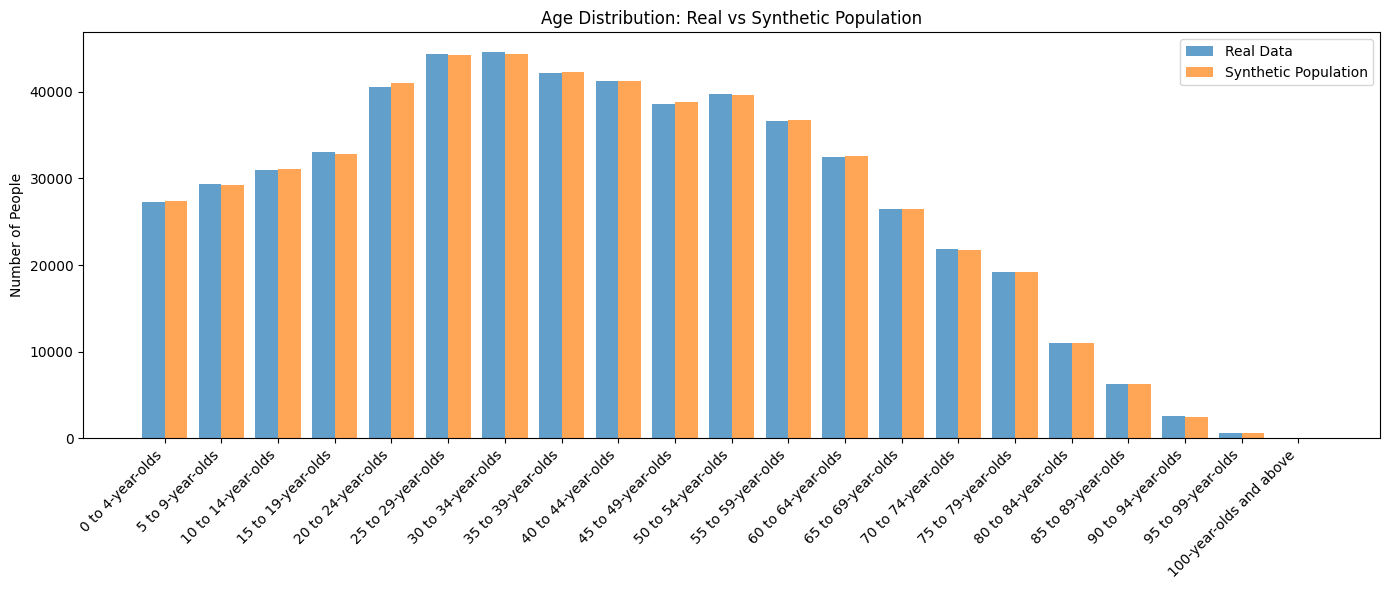

In [71]:
import matplotlib.pyplot as plt

# 1. Calculate the synthetic age distribution from the agents DataFrame
synthetic_counts = []
age_bins = []
for age_group, (min_age, max_age) in age_ranges.items():
    count = ((agents['Age'] >= min_age) & (agents['Age'] <= max_age)).sum()
    synthetic_counts.append(count)
    age_bins.append(age_group)

# 2. Calculate the real-world age distribution from the cleaned df
# Sum across all neighbourhoods for each age group
real_counts = []
for age_group in age_ranges.keys():
    if age_group in df.columns:
        # Convert to numeric, ignore errors
        real_counts.append(pd.to_numeric(df[age_group], errors='coerce').sum())
    else:
        real_counts.append(0)

# 3. Plot both distributions side by side
x = range(len(age_bins))
plt.figure(figsize=(14, 6))
plt.bar(x, real_counts, width=0.4, label='Real Data', align='center', alpha=0.7)
plt.bar([i + 0.4 for i in x], synthetic_counts, width=0.4, label='Synthetic Population', align='center', alpha=0.7)
plt.xticks([i + 0.2 for i in x], age_bins, rotation=45, ha='right')
plt.ylabel('Number of People')
plt.title('Age Distribution: Real vs Synthetic Population')
plt.legend()
plt.tight_layout()
plt.show()

There are a variety of ways that we can make this more accurate but for the purposes of building the model itself, this graph is considered to be sufficient validation of the synthetic populations representation of the real data.

Also, DO NOT be like a fool and forget to save your cleaned data file or the agents file like I did. 

In [72]:
# Save the updated agents DataFrame back to a CSV file if needed
df.to_csv('Demographics/21age_cleaned.csv', index=False)
agents.to_csv('agents.csv', index=False)